# **Models: Concepts, Strengths, Weaknesses and Use Cases**
---


## **Logistic Regression**

*   **What problem type is it for?**

    Logistic Regression is used for binary classification problems (e.g., yes/no, true/false).

---

*   **What assumptions does it make?**
    1. Categorical Output
      - The output (dependent variable) must be categorical (typically 0 or 1).

    2. Linear Relationship with Log-Odds
      - Instead of directly predicting a category, the model predicts something called log-odds (explained below), which should increase or decrease in a straight-line way with the input features.
      - 🔍 *Example:* As study hours(feature) increase, the chance of passing(label) increases steadily.

    3. Features are Independent
      - Features shouldn’t be highly correlated — each should give unique information.
      - 🔍 *Example:*  "Hours studied" and "Pages read" might overlap too much.

    4. Few or no extreme outliers
      - Logistic Regression is sensitive to outliers because they can heavily influence the coefficients and predictions.
      - 🔍 *Example:* One person studying 1000 hours (while most study 10–30) might throw off the model.
---

*   **How does it work conceptually?**
    - Takes input features and calculates a weighted sum
      - (Each feature is multiplied by a learned weight → then all are added up(and a bias term is added))
    - Applies the sigmoid function to map that sum to a probability between 0 and 1.
    - If the probability is > 0.5 → class = 1, else → class = 0.
    
*   **What are Log Odds?**

    Instead of predicting yes/no directly, logistic regression first calculates the odds of the outcome and then takes the log of those odds — which gives us the log-odds.

    Odds = probability of success / probability of failure

    Example:
    If the chance of passing is 0.8
    → Odds = 0.8 / (1 - 0.8) = 4 (4 to 1)
    → Log(4) ≈ 1.39 → this is what the model tries to predict linearly

    Then the sigmoid function takes the weighted sum (which the model interprets as log-odds).

    ```python
    import numpy as np

    def sigmoid(z):
        # Here, z represents the log-odds (i.e., the weighted sum of inputs)
        return 1 / (1 + np.exp(-z))
---
*   **Strengths**

    - Easy to implement and interpret.
    - Fast to train and requires few computational resources.
    - Provides probability estimates.
    - Performs well when data is linearly separable.
    - Interpretable coefficients: You can examine each feature’s weight to understand how it affects the prediction.
    - Good for a baseline model
---
*   **Weaknesses**

    - Doesn’t work well with non-linear data.
    - Assumes feature independence.
    - Sensitive to outliers.
    - Can underperform when classes are not well separated.
---
* **When to Use**

    - When you want a quick, interpretable model
    - When your data has a linear trend
    - When the problem is binary classification
    - When you need a baseline to compare more complex models
---
*  **When NOT to Use**

    - The relationship between features and the outcome is non-linear.
    - Features are strongly correlated.
    - When you are working with multi-class problems
(Unless using the extended version: Multinomial Logistic Regression in sklearn)

[[ 1.2349949  -0.73168763]
 [ 1.00459142 -1.05172286]
 [ 1.07746664 -0.9609536 ]
 [-0.00832267 -1.7576143 ]
 [ 0.09145925  0.19690952]
 [ 0.63356167 -1.17278867]
 [ 1.8073481   1.73476635]
 [ 2.33026777  2.25911758]
 [ 1.01215141 -0.95668044]
 [ 1.03307436 -0.85545993]
 [ 1.44537152 -0.74322936]
 [ 0.60046915 -1.43949185]
 [ 0.12437227  0.19896733]
 [ 0.47335819 -1.43862044]
 [ 0.85095512 -1.18455216]
 [ 1.71073996  1.56900774]
 [ 1.8669662  -0.36915809]
 [ 0.22485502  0.29482153]
 [ 0.80375081  0.74491926]
 [ 2.22140553  2.10036638]
 [ 3.07752729  2.90114736]
 [ 0.57357881 -1.35297943]
 [ 0.10320711  0.21791213]
 [ 0.76361798 -1.18691259]
 [ 1.32272135 -0.59340317]
 [-0.22595246 -0.14928517]
 [ 0.55656344 -1.31038476]
 [ 0.3808594  -1.57866861]
 [ 2.31414829  2.29519066]
 [ 0.01258051  0.12054434]
 [ 1.21530116 -0.96090774]
 [ 1.04031359  1.11434941]
 [ 0.78779153 -1.24378397]
 [ 1.23413512  1.20275034]
 [ 0.73254597  0.69041433]
 [ 0.77018374  0.74976134]
 [ 0.51142713 -1.28981425]
 

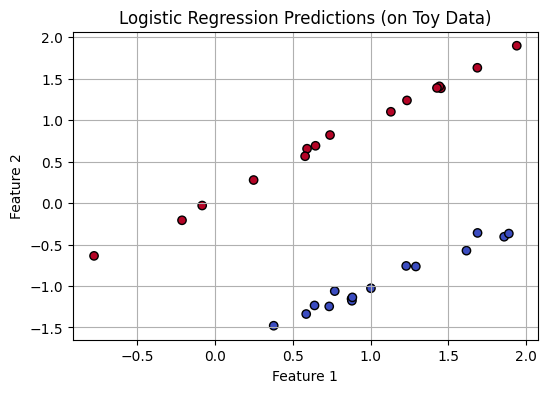

In [ ]:
# Visual Demo (Toy Example)

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Generate simple 2D classification data
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# print(X_train)
# print("y_train: \n", y_train)
# print("X_test: \n",X_test)
# print("y_test:\n", y_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and print classification report
y_pred = model.predict(X_test)
print("y_test (actual):", y_test)
print("y_pred (predicted):", y_pred)

print(classification_report(y_test, y_pred))
# Plot predictions
plt.figure(figsize=(6, 4))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("Logistic Regression Predictions (on Toy Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


This plot visualizes the predictions made by a Logistic Regression model on a toy dataset with just two features (so we can plot it easily). Each point represents a test sample:

🔴 Red points: predicted as Class 1

🔵 Blue points: predicted as Class 0

You can see that the two classes are linearly separable, meaning a straight line (the decision boundary) can clearly split the two groups. Logistic Regression performs very well in such cases, assigning high confidence to each prediction.

## **Decision Trees**


*   **What problem type is it for?**

    Decision Trees are flexible models used for both classification and regression.

    If you're predicting a category (e.g., spam or not spam) → it's a classification tree.  
    If you're predicting a number (e.g., test score or house price) → it's a regression tree.

    🔍 Example:

    - Will a student pass/fail based on study hours? → Classification  
    - What score might they get? → Regression

---

*   **What assumptions does it make?**

    Decision Trees are **non-parametric** models — they don’t assume that your data follows a specific pattern (like being linear or normally distributed).

    However, they still rely on a few things:

    - **Meaningful features**  
      Trees will split based on what’s available — even irrelevant patterns.  
      If the data includes noisy or unhelpful features, trees might overfit.

    - **Exact trust in data**  
      Trees don’t generalize — they reflect the training data exactly.  
      If your training data is biased or unrepresentative, your predictions will be too.

    - **Axis-aligned splits (Important!)**  
      Trees split using one feature at a time:
      > “Is study hours > 5?” → Go right  
      > “Is sleep hours < 6?” → Go left  

      They cannot learn curved or diagonal decision boundaries  
      (e.g., "study + sleep > 10" is not possible).

      ➡️ This limitation is why deep trees or **ensemble models** (like Random Forests) are often used.

    - **Instability**  
      Small changes in the training data can build a completely different tree.  
      This makes trees **high-variance** models.
      
    - **Poor generalization**  
      Trees tend to memorize the training data too closely, especially if allowed to grow deep.  
      This means they might do great on training data but poorly on unseen data.

      ➡️ This is called **overfitting**, and it's why Decision Trees are considered **low-bias, high-variance** models.

    ✅ They do *not* require:

    - Feature scaling  
    - Feature independence  
    - Categorical encoding (they handle categories natively)  
    - Linearity  
    - Normally distributed features
    
    ❗ Still, trees are not magic:

      - They can overfit to small, noisy datasets  
      - They may struggle with heavily imbalanced data (e.g., 95% of class A)  
      - They may be misled by irrelevant or highly correlated features

    ⚖️ In summary:

      - Fewer assumptions → More flexibility  
      - More flexibility → More risk of overfitting

    💡 Bottom line:  
      - Trees don’t care about linearity, scaling, or distributions.  
      But garbage in = garbage out. Clean, thoughtful data still matters.

---
*   **How does it work conceptually?**

    A Decision Tree works like a flowchart of yes/no questions.

    At the top, it looks at the full dataset and asks:

    "Which feature can I split on to best separate the data into different classes?"

    It tries all the features, one by one, and checks different values (like: is study_hours > 5?).
    Then it picks the best split — the one that creates groups that are more “pure” (meaning mostly the same class).

    To decide which split is best, the model uses one of two main methods:

    - Entropy + Information Gain (used in the ID3 algorithm)

    - Gini Impurity (used in the CART algorithm, which is what Scikit-learn uses)

    Once it finds the best split, it divides the data into two branches.

    Then it repeats the same process on each branch:

    - Look at the remaining data

    - Try possible splits again

    - Pick the best one

    - Split again

    This keeps going until:

    The groups are pure (only one class left), or the tree hits a limit (like max depth, or not enough samples)

    Even though the math behind these methods is more detailed, the idea stays simple:

    At every step, the tree is trying to ask the question that best splits the data — so the groups become easier to classify.

---   

*   **Strengths**

    - Easy to understand and visualize — decisions are made like flowcharts.

    - No need for feature scaling or normalization.

    - Can handle both numerical and categorical data.

    - Works well even when the relationship between features and target is non-linear.

    - Can reveal which features are important (based on how early they appear in the tree).

    - Fast to train on small to medium datasets.

---
*   **Weaknesses**

    - Very easy to overfit, especially with deep trees or noisy data.

    - Small changes in the data can create a completely different tree (high variance).

    - Doesn’t generalize well unless its complexity is controlled — otherwise it memorizes the training data too closely.

      ➕ This is done through regularization — adjusting certain settings (called hyperparameters) like:

      Maximum depth → how deep the tree can go

      Minimum samples per leaf → how many samples a leaf must have

      Pruning → cutting back unnecessary branches

      These settings help prevent the tree from overfitting to noise in the training data, so it performs better on new data.

    - Can struggle with imbalanced datasets (e.g., 90% class A, 10% class B).

    - Only splits using straight-line (axis-aligned) cuts — can’t capture complex decision boundaries.

---
* **When to Use**

    - When you want a quick, interpretable model with visual output.

    - When your data contains both numerical and categorical variables.

    - When you suspect the relationship between inputs and outputs is non-linear.

    -  As a building block for more powerful ensemble models (like Random Forests and Gradient Boosting).

---

*  **When NOT to Use**

    - When your dataset is small and noisy — it may overfit badly.

    - When stability matters — trees can change a lot from tiny changes in data.

    - When you need smooth or probabilistic predictions — trees make hard decisions.

    - When your dataset is very large with high-dimensional features — you may need regularization or ensembles instead.
---
💡 **Quick Terms**

- **Generalization**: A model’s ability to perform well on unseen/test data.
- **Regularization**: Techniques to control model complexity so it doesn’t overfit.



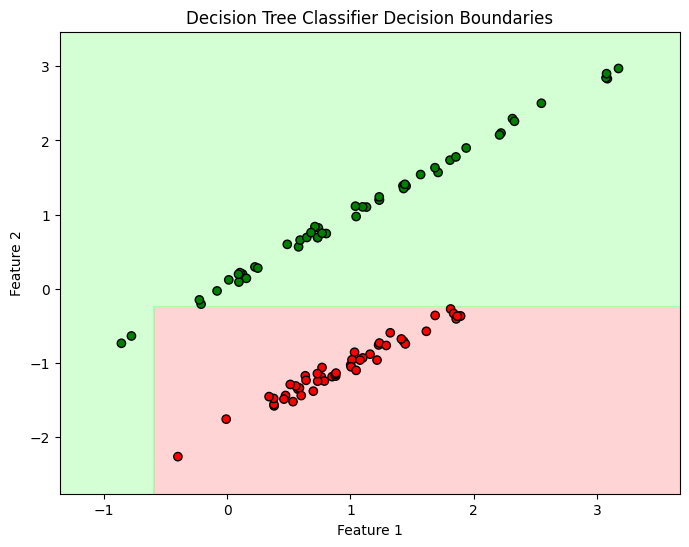

In [1]:
# Visual Demo: How Decision Trees Split Data
# 1. Toy dataset
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap
import numpy as np

# Create a toy dataset
X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1,
    n_informative=2, random_state=42
)

# 2. Train a decision tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# 3. Plot decision boundaries
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']), alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'green']), edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Tree Classifier Decision Boundaries")
plt.show()


🧠 How to Read This Decision Tree Plot:

🟩 Green Region:

The model predicts Class 1 (green dots) for any point falling in this area.

So if a new point lands here (e.g., Feature 1 = 1.5, Feature 2 = 2), the tree would classify it as Class 1.

🟥 Pink Region:

The model predicts Class 0 (red dots) for this entire section.

So if a new point falls here (e.g., Feature 1 = 2, Feature 2 = -1), it’ll be predicted as Class 0.

---
🔪 What’s Happening Behind the Scenes:

The tree is chopping the 2D space using horizontal and vertical lines.

These “cuts” are based on conditions like:

“If Feature 2 ≤ 0 → go left branch, else right branch”

These rules are decided by comparing Information Gain (or Gini Impurity) at each possible split — whichever gives the purest separation is chosen.

---

🌱 What You’re Seeing:

A trained Decision Tree on a toy dataset with 2 features.

The tree learned simple if-else rules that define this partitioning.

That’s why the regions are rectangular — Decision Trees only split along axes, never diagonally or in curves.

---

💡 Insight:
This plot shows one of the reasons Decision Trees don’t generalize well sometimes:

They make sharp, blocky decisions, even when real-world patterns might be curved or smooth.

Unless tuned or pruned, they might overfit the training data.